In [ ]:
import pydot
from collections import defaultdict 
from IPython.display import Image, display

In [ ]:
def lstr(p):
        return ''.join([str(elem)  for elem in p])

#1 Pancake network

In [ ]:
def graph(s): 

        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        G = pydot.Dot(graph_type="graph",strict=True)
        
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append(s) 
        visited[lstr(s)] = True
  
        while queue: 
  
            # Dequeue a vertex from queue 
            s = queue.pop(0) 
            graph[lstr(s)]=[]
            node = pydot.Node(lstr(s))
            G.add_node(node)
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if(s != sorted(s)):
              for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]  
                if (d != s) and not(lstr(d) in visited.keys()):
                 
                  if (d != sorted(d)):
                    node = pydot.Node(lstr(d))
                  else:
                    node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green
                  
                  G.add_node(node)
                  edge = pydot.Edge(lstr(s),lstr(d))
                  G.add_edge(edge)
                  graph[lstr(s)].append(lstr(d))
                  queue.append(d) 
                  visited[lstr(d)] = True
                else:
                  edge=pydot.Edge(lstr(s),lstr(d)) #conect the other cases
                  G.add_edge(edge)
                  
              
        # Dsplay the pydot graph G
        im = Image(G.create_png())
        display(im)

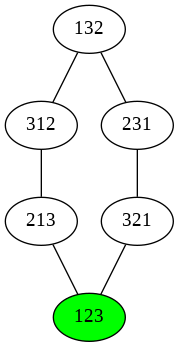

In [ ]:
p = [1,3,2]
graph(p)

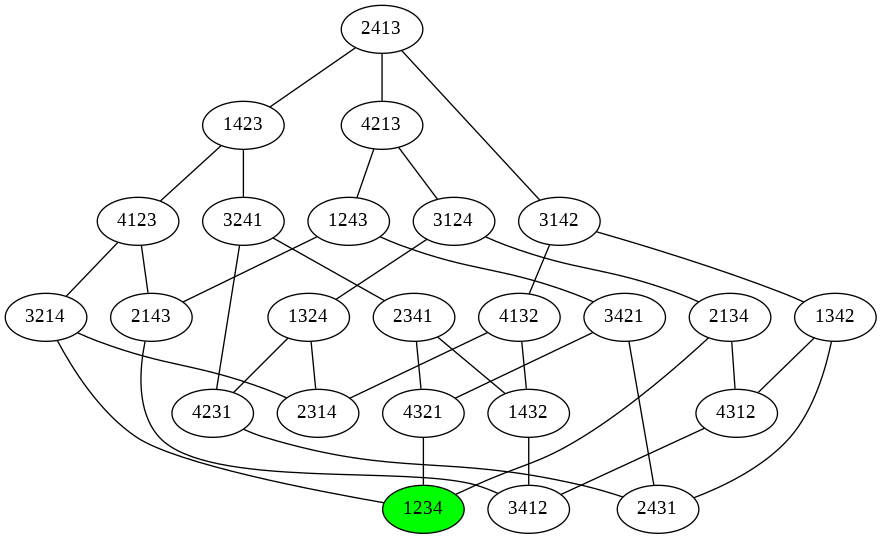

In [ ]:
p=[2,4,1,3]
graph(p)

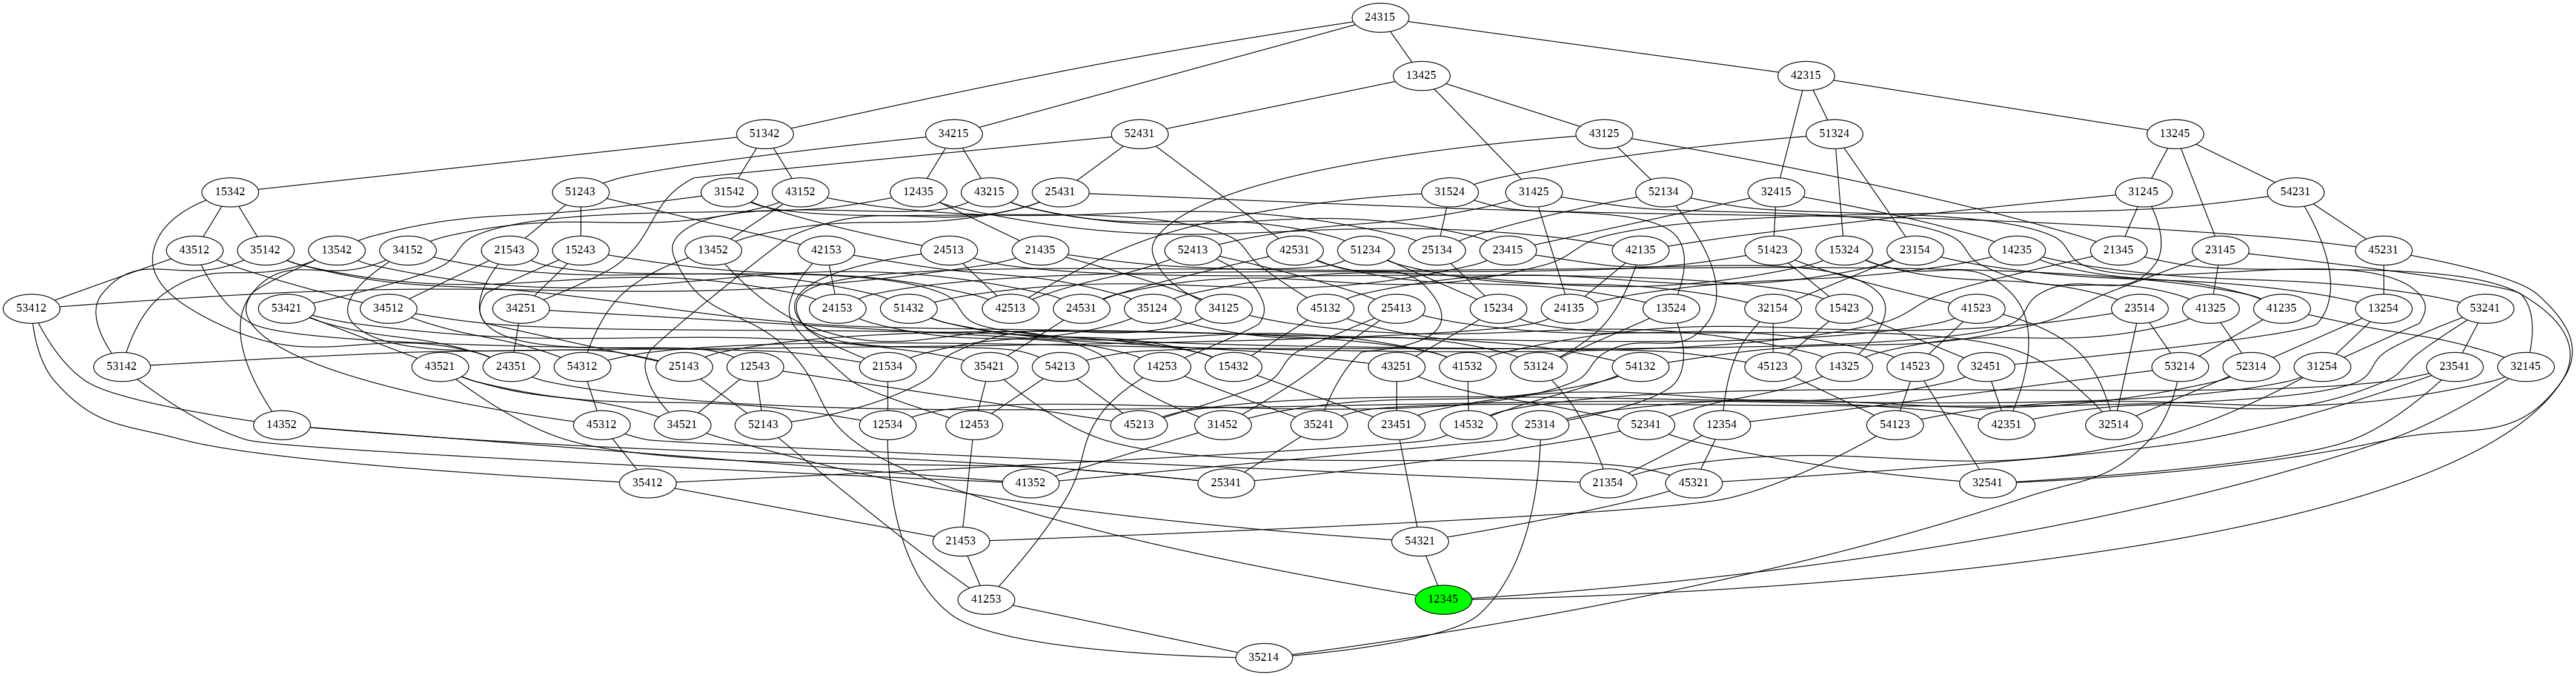

In [ ]:
p=[2,4,3,1,5]
graph(p)

In [ ]:
p=[6,2,4,3,1,5]
graph(p)

Output hidden; open in https://colab.research.google.com to view.

#2 Calculate the $P_n$

In [ ]:
def pne(s): #returns the flips necasary to sort the pancakes
        graph = defaultdict()
        visited = defaultdict()

        queue = [] 
        final=sorted(s)
        # Mark the source node as visited and enqueue it 
        queue.append([s,0]) #include the distance from the first node
        visited[lstr(s)] = True
  
        while queue: 
   
            s = queue.pop(0) 
            graph[lstr(s[0])]=[s[1]]
            if (s[0] != final):
              for i in range(len(s[0])-1):
                d = s[0][i+1::-1] + s[0][i+2:]  
                if (d != s[0]) and not(lstr(d) in visited.keys()):                              
                  graph[lstr(s[0])].append(lstr(d))

                  queue.append([d,graph[lstr(s[0])][0]+1]) 
                  visited[lstr(d)] = True
            else: #return the distance from the first node
              return s[1]             

     

In [ ]:
from itertools import permutations
def Pn(n):
  perm=permutations(range(n))
  max=0
  for i in perm:
    p=pne(list(i))
    if max<p:
      max=p
  return max

The next code run an aproximate of 8 hours, the biggest $P_n$that i got was $P_8=9$.

In [ ]:
n=1
while True:
  print(Pn(n))
  n+=1

0
1
3
4
5
7
8
9


#3 Two spatules tree



In [ ]:
def twoSpatulesGraph(s): 

        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        G = pydot.Dot(graph_type="digraph")
        
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append(s) 
        visited[lstr(s)] = True
  
        while queue: 
  
            # Dequeue a vertex from queue 
            s = queue.pop(0) 
            graph[lstr(s)]=[]
            node = pydot.Node(lstr(s))
            G.add_node(node)
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if(s != sorted(s)):
              for j in range(len(s)):
                for i in range(len(s)-j-1):
                    st = s[j:]
                    d = s[:j] + st[i+1::-1] + st[i+2:]

                if (d != s) and not(lstr(d) in visited.keys()):
                 
                  if(d != sorted(d)):
                    node = pydot.Node(lstr(d))
                  else:
                    node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green
                  
                  G.add_node(node)
                  edge = pydot.Edge(lstr(s),lstr(d))
                  G.add_edge(edge)
                  graph[lstr(s)].append(lstr(d))
                  queue.append(d) 
                  visited[lstr(d)] = True 
              
        # Dsplay the pydot graph G
        im = Image(G.create_png())
        display(im)

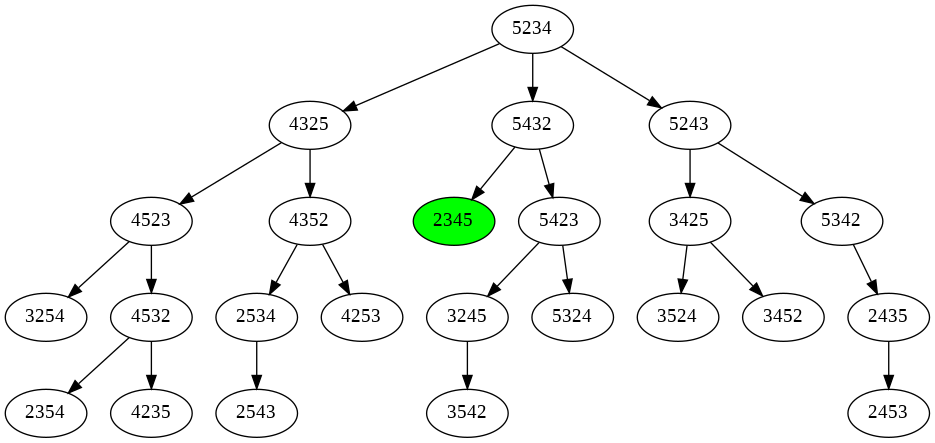

In [ ]:
a= [5,2,3,4]
twoSpatulesGraph(a)

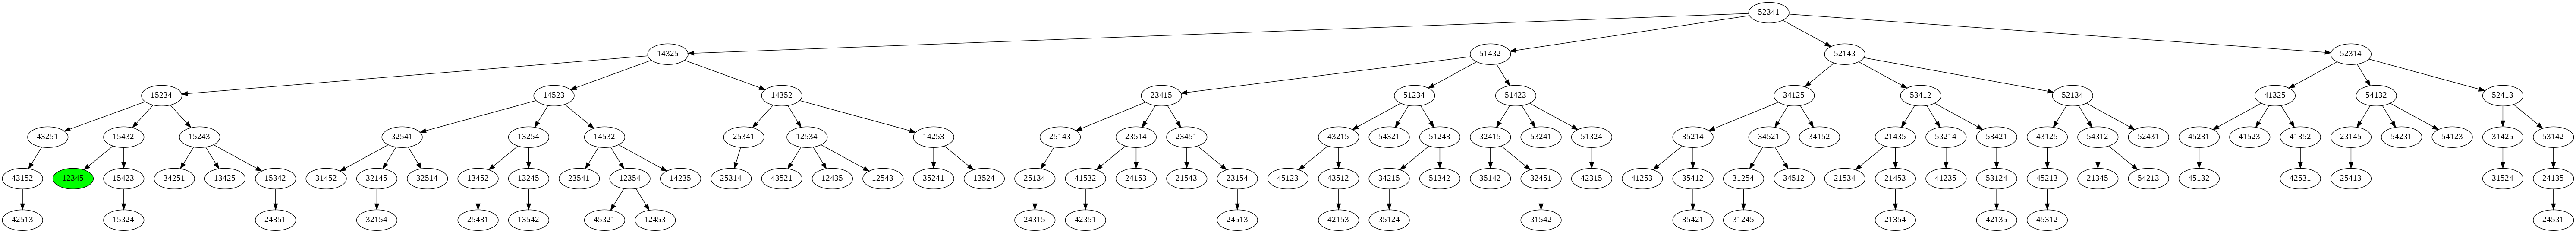

In [ ]:
a= [5,2,3,4,1]
twoSpatulesGraph(a)